In [299]:
#import appropriate libraries for web scraping and data science
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import pandas as pd
import matplotlib.pyplot as plt

In [300]:
my_url = 'https://www.harryrosen.com/en/clothing/c/new-clothing?pageSize=96'

In [301]:
#Open a connection to retreive the page and close connection after
uClient = uReq(my_url)
page_html = uClient.read()
uClient.close()

In [302]:
#Create a csv file for storing product information 
filename = "products.csv"
f = open(filename, "w")

headers = "Brand,Product,Price"
f.write(headers)
f.write("\n")

1

In [303]:
#Scrape the HTML of the Harry Rosen New Products Page for information on brand, product name and price
page_soup = soup(page_html, "html.parser")
containers = page_soup.findAll("div",{"class":"hr-product-lister-grid-item-content-wp"})

#for each product in the website retreive the brand, name and price from the html and write to the csv file
for container in containers:
    brand = container.h3.text
    product_name = container.h4.text
    price = container.findAll("div", {"class":"hr-product-price"})[0].text.strip()[1:-3].replace(",", "")
    float(price)
    #print(brand + ',' + product_name.replace(",", "|") + ',' + price + "\n")
    f.write(brand + ',' + product_name.replace(",", "|") + ',' + price + "\n")

In [304]:
#Create a pandas data frame from the csv file run the analysis on
df = pd.read_csv("products.csv")
#print(df)

In [305]:
#Group the results by the brand and find the maximum product price for each brand
results = df.groupby(['Brand'])['Price'].max().reset_index()

#sort results and set the index to Brand 
results_sorted = results.sort_values(by='Price')
results_sorted.set_index("Brand",drop=True,inplace=True)
print(results_sorted)

                    Price
Brand                    
Eton                  290
Versace Collection    395
Paul & Shark          495
Diesel                498
Moncler              1430
Z Zegna              1698
Giorgio Armani       3395
Thom Browne          3650
Brunello Cucinelli   5395
Ermenegildo Zegna    6185
Loro Piana          19310


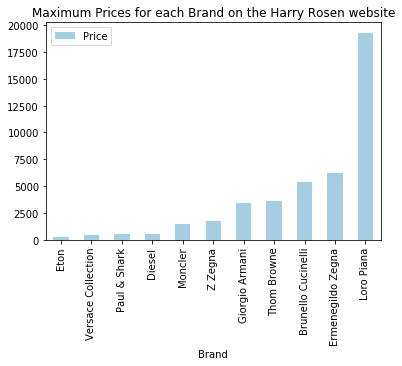

In [306]:
#plot results using the matplotlib 

results_sorted.plot(kind='bar', figsize=(15, 10) title ="Maximum Prices for each Brand on the Harry Rosen website", stacked=True, colormap = 'Paired')